<a href="https://colab.research.google.com/github/lphuong304/CS114.L21/blob/main/Practice%20In%20Class/19520227/BaiTap10/19520227_BT10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><strong>BÀI TẬP 9 - 9/11/2021</strong></h1>
<h1 align="center"><strong>LẬP TRÌNH PYTHON CHO MÁY HỌC CS116.M11 - BÀI TOÁN XÂY DỰNG MODULE CHO BỘ DỮ LIỆU MNIST </strong></h1>
<hr>


# GIỚI THIỆU:

1. Họ và tên: Nguyễn Ngọc Lan Phương
2. MSSV: 19520227 - KHMT2019
3. Lớp: CS116.M11
4. Bài tập: Bài toán Xây dựng Module cho bộ dữ liệu MNIST.
5. Ngày thực hiện: 9/11/2021
 

#Module's Architecture:

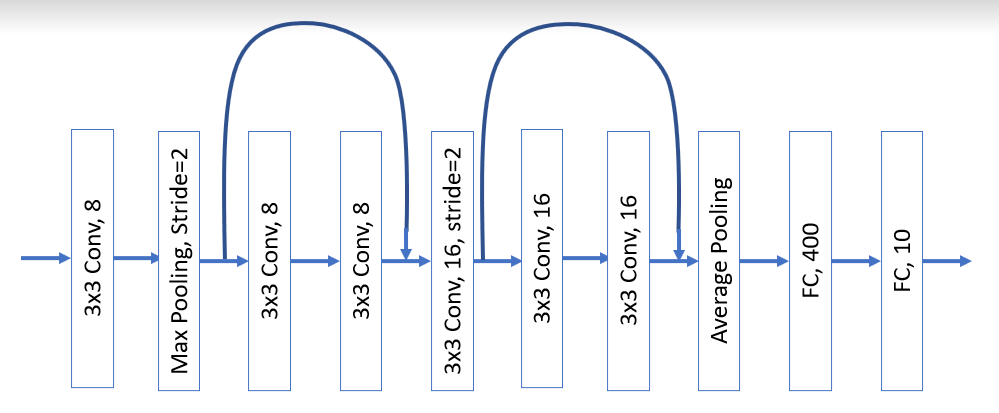

##1. import packages

In [ ]:
#import packages
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Add
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.metrics import categorical_crossentropy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

##2. load data

In [ ]:
#load data
mnist = mnist

(X, y), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print("Size of training datasets:", X_train.shape)
print("Size of training labels:", y_train.shape)
print("Size of validation datasets:", X_val.shape)
print("Size of validation labels:", y_val.shape)
print("Size of testing datasets:", X_test.shape)
print("Size of testing labels:", y_test.shape)

Size of training datasets: (48000, 28, 28)
Size of training labels: (48000,)
Size of validation datasets: (12000, 28, 28)
Size of validation labels: (12000,)
Size of testing datasets: (10000, 28, 28)
Size of testing labels: (10000,)


##3. build custom module resnet

In [ ]:
class ResNet:
  def __init(self):
    self.model = None
  def build(self, input_dim):
    input = Input(shape = input_dim)

    C1 = Conv2D(8, (3,3), padding = 'same', activation = 'relu')(input)

    S1 = MaxPooling2D(pool_size = (2,2) , padding = 'same')(C1)

    C2 = Conv2D(8, (3, 3), padding = 'same', activation = 'relu')(S1)
    C3 = Conv2D(8, (3, 3), padding = 'same', activation = 'relu')(C2)
    C4 = Add()([S1, C3])

    C5 = Conv2D(16, (3, 3), padding = 'same', strides=(2, 2), activation = 'relu')(C4)
    C6 = Conv2D(16, (3, 3), padding = 'same', activation = 'relu')(C5)
    C7 = Conv2D(16, (3, 3), padding = 'same', activation = 'relu')(C6)
    C8 = Add()([C5, C7])
    

    S2 = AveragePooling2D()(C8)
    Flat = Flatten()(S2)
    F = Dense(400, use_bias=True, activation='sigmoid')(Flat)
    ouput = Dense(10, activation='softmax', use_bias=True)(F)

    self.model = Model(input, ouput)
    self.model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

  def train(self, x_train, y_train, x_val, y_val): 
    self.model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 15, batch_size = 128)

  def load_model(self, model_file):
    self.model = load_model(model_file)

  def predict(self, x_test):
    return self.model.predict(x_test)

  def save(self, model_file):
    self.model = save(model_file)

  def summary(self):
    self.model.summary()
    

In [ ]:
NeutralNetwork = ResNet()
NeutralNetwork.build((28,28,1))
NeutralNetwork.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 8)    80          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 14, 14, 8)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 8)    584         max_pooling2d[0][0]              
______________________________________________________________________________________________

##4. Pre-processing Data

In [ ]:
def OneHot(y):
  onehot = np.zeros((y.shape[0], 10))
  for i in range(y.shape[0]):
    onehot[i, int(y[i])] = 1
  return onehot

In [ ]:
y_train_oh = OneHot(y_train)
y_test_oh = OneHot(y_test)
y_val_oh = OneHot(y_val)
y_train_oh.shape

(48000, 10)

In [ ]:
normalizedX_train = X_train/255.0
normalizedX_val = X_val/255.0
normalizedX_test = X_test/255.0

##5. training

In [ ]:
NeutralNetwork.train(normalizedX_train, y_train, normalizedX_val, y_val)

Epoch 1/15
375/375 [==============================] - 25s 66ms/step - loss: 0.0697 - val_loss: 0.0440
Epoch 2/15
375/375 [==============================] - 26s 69ms/step - loss: 0.0302 - val_loss: 0.0452
Epoch 3/15
375/375 [==============================] - 27s 73ms/step - loss: 0.0267 - val_loss: 0.0419
Epoch 4/15
375/375 [==============================] - 26s 69ms/step - loss: 0.0235 - val_loss: 0.0401
Epoch 5/15
375/375 [==============================] - 25s 68ms/step - loss: 0.0224 - val_loss: 0.0362
Epoch 6/15
375/375 [==============================] - 26s 69ms/step - loss: 0.0197 - val_loss: 0.0562
Epoch 7/15
375/375 [==============================] - 26s 70ms/step - loss: 0.0174 - val_loss: 0.0429
Epoch 8/15
375/375 [==============================] - 25s 66ms/step - loss: 0.0165 - val_loss: 0.0454
Epoch 9/15
375/375 [==============================] - 25s 66ms/step - loss: 0.0147 - val_loss: 0.0426
Epoch 10/15
375/375 [==============================] - 26s 69ms/step - loss: 0.012

##5. Prediction and Evaluation

In [ ]:
y_pred = NeutralNetwork.predict(normalizedX_test)
labels = [i for i in range(10)]
y_pred = [labels[np.argmax(index)] for index in y_pred]

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       974
           1       0.99      1.00      0.99      1129
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1017
           4       0.99      0.99      0.99       978
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       962
           7       0.99      0.99      0.99      1034
           8       0.99      0.99      0.99       977
           9       0.98      0.99      0.99      1005

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



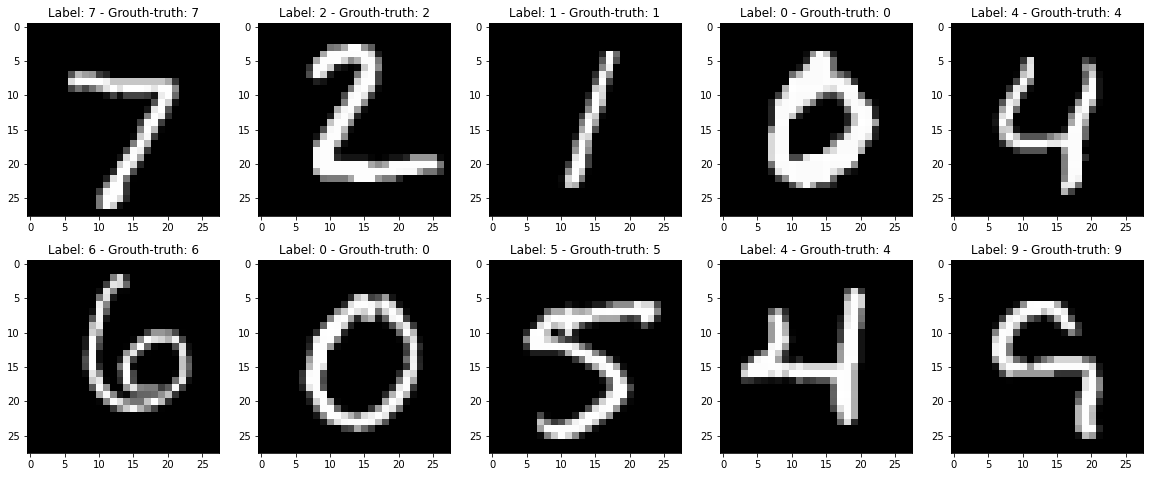

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,8))
for i in range(2):
  for j in range(5):
    axes[i][j].imshow(X_test[100*i+j], cmap='gray')
    axes[i][j].set_title('Label: {} - Grouth-truth: {}'.format(y_test[100*i+j], y_pred[100*i+j]))